<a href="https://colab.research.google.com/github/SarahSouzaPontes/covid_veleiro/blob/main/Grafico_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
!pip install matplotlib -q #instalação Matplotlib

In [130]:
!pip install epiweeks -q

In [158]:
import matplotlib.pyplot as plt #importação matplotlib
from datetime import datetime
import pandas as pd # importação pandas
from epiweeks import Week, Year

In [99]:
#conectar ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
df_casos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/serie_casos_covid19_BA.csv', header = 0, sep = ";", thousands='.')

In [161]:
df_casos #casos novos

,date,casos,casos_novos
0,06/03/2020,1,1
1,07/03/2020,2,1
2,08/03/2020,2,0
3,09/03/2020,2,0
4,10/03/2020,2,0
...,...,...,...
875,30/07/2022,1660378,1489
876,31/07/2022,1660584,206
877,01/08/2022,1660656,72
878,02/08/2022,1662253,1597


In [185]:
df_busca = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/veleiro.csv' , header = 0, sep = ",", thousands='.', skiprows=1)

In [186]:
df_busca 

,Semana,VELEIRO: (Bahia)
0,2020-01-05,34
1,2020-01-12,27
2,2020-01-19,51
3,2020-01-26,33
4,2020-02-02,97
...,...,...
133,2022-07-24,11
134,2022-07-31,44
135,2022-08-07,43
136,2022-08-14,21


In [187]:
df_busca = df_busca.rename(columns = {"VELEIRO: (Bahia)": "Busca na Plataforma Google Trends por: Veleiro"})

In [188]:
df_busca

,Semana,Busca na Plataforma Google Trends por: Veleiro
0,2020-01-05,34
1,2020-01-12,27
2,2020-01-19,51
3,2020-01-26,33
4,2020-02-02,97
...,...,...
133,2022-07-24,11
134,2022-07-31,44
135,2022-08-07,43
136,2022-08-14,21


In [189]:
df_casos["date"] = pd.to_datetime(df_casos["date"], format="%d/%m/%Y")
df_casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         880 non-null    datetime64[ns]
 1   casos        880 non-null    int64         
 2   casos_novos  880 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 20.8 KB


In [190]:
def epiweek(date):
  return Week.fromdate(date, system="iso")

In [191]:
df_casos["epiweek"]=df_casos["date"].apply(epiweek)

In [192]:
df_casos = df_casos.rename(columns = {"casos_novos": "Incidência Covid"})

In [193]:
df_casos=df_casos.groupby("epiweek")["Incidência Covid"].aggregate('sum')

In [194]:
df_casos

epiweek
2020W10        2
2020W11        7
2020W12       46
2020W13      101
2020W14      245
           ...  
2022W27    26508
2022W28    21756
2022W29    15908
2022W30    11229
2022W31     3297
Name: Incidência Covid, Length: 127, dtype: int64

In [195]:
df_busca["Semana"]=pd.to_datetime(df_busca["Semana"], format="%Y-%m-%d")
df_busca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Semana                                          138 non-null    datetime64[ns]
 1   Busca na Plataforma Google Trends por: Veleiro  138 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [196]:
df_busca["epiweek"]=df_busca["Semana"].apply(epiweek)

In [197]:
df_busca

,Semana,Busca na Plataforma Google Trends por: Veleiro,epiweek
0,2020-01-05,34,2020W01
1,2020-01-12,27,2020W02
2,2020-01-19,51,2020W03
3,2020-01-26,33,2020W04
4,2020-02-02,97,2020W05
...,...,...,...
133,2022-07-24,11,2022W29
134,2022-07-31,44,2022W30
135,2022-08-07,43,2022W31
136,2022-08-14,21,2022W32


In [198]:
df_agrupado = pd.merge(df_casos, df_busca, on="epiweek")

In [199]:
df_agrupado

,epiweek,Incidência Covid,Semana,Busca na Plataforma Google Trends por: Veleiro
0,2020W10,2,2020-03-08,0
1,2020W11,7,2020-03-15,16
2,2020W12,46,2020-03-22,32
3,2020W13,101,2020-03-29,14
4,2020W14,245,2020-04-05,28
...,...,...,...,...
122,2022W27,26508,2022-07-10,20
123,2022W28,21756,2022-07-17,12
124,2022W29,15908,2022-07-24,11
125,2022W30,11229,2022-07-31,44


In [200]:
df_agrupado.drop("Semana", axis=1, inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e92630e50>,
      dtype=object)

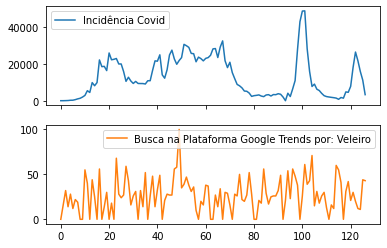

In [201]:
df_agrupado.plot(subplots=True)